# Data Preparation and Visualization

## 1. Import Libraries

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Read Data & Quick-look Data

In [170]:
#read data from github
data=pd.read_csv('https://raw.githubusercontent.com/khairunisa6/Study-Case-Astra-Creditscore/master/training.csv', encoding='Latin1')
data.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,2,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,3,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,4,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


In [171]:
data.tail()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
16620,16621,350000.0,1,2,1,56,3,2,2,2500.0,2500.0,2500.0,0.0,0.0,0.0,1
16621,16622,380000.0,2,2,1,60,2,2,2,72557.0,77708.0,79384.0,7000.0,3500.0,0.0,1
16622,16623,340000.0,2,2,1,56,4,3,2,3565.0,3356.0,2758.0,0.0,0.0,22000.0,1
16623,16624,430000.0,1,1,1,61,1,0,0,-1645.0,78379.0,76304.0,85900.0,3409.0,1178.0,1
16624,16625,410000.0,1,2,1,61,0,0,0,47929.0,48905.0,49764.0,2078.0,1800.0,1430.0,1


In [172]:
#get information about type of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 16 columns):
ID           16625 non-null int64
LIMIT_BAL    16625 non-null float64
MARRIAGE     16625 non-null int64
EDUCATION    16625 non-null int64
SEX          16625 non-null int64
AGE          16625 non-null int64
PAY_1        16625 non-null int64
PAY_2        16625 non-null int64
PAY_3        16625 non-null int64
BILL_AMT1    16625 non-null float64
BILL_AMT2    16625 non-null float64
BILL_AMT3    16625 non-null float64
PAY_AMT1     16625 non-null float64
PAY_AMT2     16625 non-null float64
PAY_AMT3     16625 non-null float64
TARGET       16625 non-null int64
dtypes: float64(7), int64(9)
memory usage: 2.0 MB


In [173]:
#get information about number of rows and columns data
data.shape

(16625, 16)

In [174]:
#detection missing values each variables of data
count_missing = data.isnull().sum().sort_values(ascending = False)
count_missing

TARGET       0
PAY_AMT3     0
PAY_AMT2     0
PAY_AMT1     0
BILL_AMT3    0
BILL_AMT2    0
BILL_AMT1    0
PAY_3        0
PAY_2        0
PAY_1        0
AGE          0
SEX          0
EDUCATION    0
MARRIAGE     0
LIMIT_BAL    0
ID           0
dtype: int64

In [175]:
#Dropping columns 'ID'
data=data.drop(['ID'], axis=1)
data.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


In [176]:
#Get information about class
data['TARGET'].value_counts()

0    9989
1    6636
Name: TARGET, dtype: int64

## 3. Data Preparation

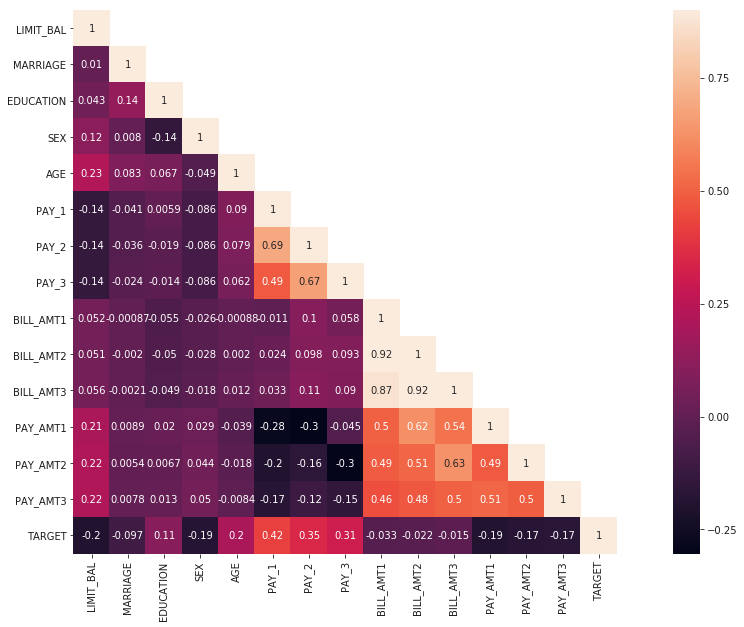

In [177]:
#create correlation with hitmap before convert label each variable to string

#create correlation
corr = data.corr(method = 'spearman')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,10)
sns.heatmap(corr, 
            mask = mask, 
            vmax = 0.9, 
            square = True, 
            annot = True)

In [178]:
#Convert categorical variable to this label each categorical variable 

data['TARGET'][data['TARGET']==1]='Tidak Terlambat'
data['TARGET'][data['TARGET']==0]='Terlambat'
data['SEX'][data['SEX']==1]='Pria'
data['SEX'][data['SEX']==2]='Wanita'
data['EDUCATION'][data['EDUCATION']==1]='S2/S3'
data['EDUCATION'][data['EDUCATION']==2]='Dipl/S1'
data['EDUCATION'][data['EDUCATION']==3]='SMA'
data['EDUCATION'][data['EDUCATION']==4]='Lainnya'
data['MARRIAGE'][data['MARRIAGE']==1]='Belum Menikah'
data['MARRIAGE'][data['MARRIAGE']==2]='Menikah'
data['MARRIAGE'][data['MARRIAGE']==3]='Lainnya'
data['PAY_1'][data['PAY_1']==0]='Tidak Terlambat'
data['PAY_1'][data['PAY_1']==1]='Terlambat 1 Bulan'
data['PAY_1'][data['PAY_1']==2]='Terlambat 2 Bulan'
data['PAY_1'][data['PAY_1']==3]='Terlambat 3 Bulan'
data['PAY_1'][data['PAY_1']==4]='Terlambat 4 Bulan'
data['PAY_2'][data['PAY_2']==0]='Tidak Terlambat'
data['PAY_2'][data['PAY_2']==1]='Terlambat 1 Bulan'
data['PAY_2'][data['PAY_2']==2]='Terlambat 2 Bulan'
data['PAY_2'][data['PAY_2']==3]='Terlambat 3 Bulan'
data['PAY_2'][data['PAY_2']==4]='Terlambat 4 Bulan'
data['PAY_3'][data['PAY_3']==0]='Tidak Terlambat'
data['PAY_3'][data['PAY_3']==1]='Terlambat 1 Bulan'
data['PAY_3'][data['PAY_3']==2]='Terlambat 2 Bulan'
data['PAY_3'][data['PAY_3']==3]='Terlambat 3 Bulan'
data['PAY_3'][data['PAY_3']==4]='Terlambat 4 Bulan'

kategorik=['MARRIAGE','SEX','EDUCATION','PAY_1','PAY_2','PAY_3','TARGET']
kategorik=data[kategorik]
numerik=data.drop(kategorik,1)
#kategorik.info()
kategorik.head()

C:\Users\faizah064287\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\faizah064287\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\faizah064287\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html

,MARRIAGE,SEX,EDUCATION,PAY_1,PAY_2,PAY_3,TARGET
0,Belum Menikah,Wanita,S2/S3,Tidak Terlambat,Tidak Terlambat,Tidak Terlambat,Terlambat
1,Belum Menikah,Wanita,S2/S3,Terlambat 1 Bulan,Terlambat 2 Bulan,Tidak Terlambat,Terlambat
2,Belum Menikah,Wanita,S2/S3,Tidak Terlambat,Tidak Terlambat,Tidak Terlambat,Terlambat
3,Belum Menikah,Wanita,S2/S3,Tidak Terlambat,Tidak Terlambat,Tidak Terlambat,Terlambat
4,Belum Menikah,Wanita,S2/S3,Tidak Terlambat,Tidak Terlambat,Tidak Terlambat,Terlambat


In [179]:
data.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,30000.0,Belum Menikah,S2/S3,Wanita,40,Tidak Terlambat,Tidak Terlambat,Tidak Terlambat,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,Terlambat
1,20000.0,Belum Menikah,S2/S3,Wanita,41,Terlambat 1 Bulan,Terlambat 2 Bulan,Tidak Terlambat,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,Terlambat
2,20000.0,Belum Menikah,S2/S3,Wanita,36,Tidak Terlambat,Tidak Terlambat,Tidak Terlambat,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,Terlambat
3,20000.0,Belum Menikah,S2/S3,Wanita,35,Tidak Terlambat,Tidak Terlambat,Tidak Terlambat,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,Terlambat
4,170000.0,Belum Menikah,S2/S3,Wanita,38,Tidak Terlambat,Tidak Terlambat,Tidak Terlambat,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,Terlambat


## 4. Data Visualization

Text(0.5,0,'Type of Target')

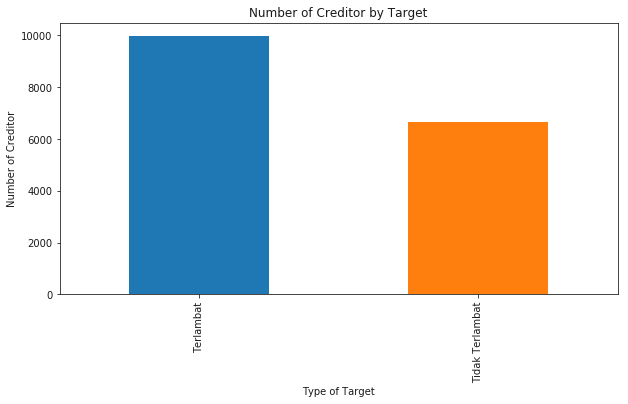

In [180]:
#Distribution of Class Target

data['TARGET'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title("Number of Creditor by Target")
plt.ylabel('Number of Creditor')
plt.xlabel('Type of Target')

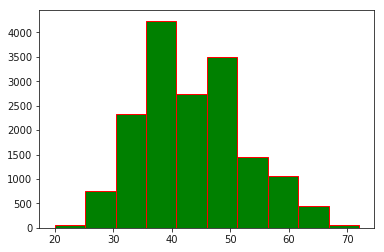

In [181]:
#Hisogram of data based Age

plt.hist(data['AGE'], 
         facecolor='green', 
         edgecolor='red', 
         bins=10)
plt.show()

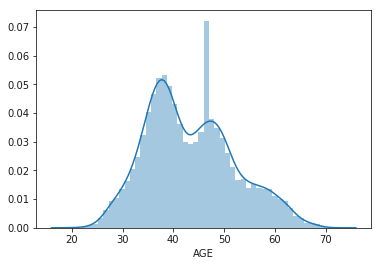

In [182]:
#Distribution plot of Age
sns.distplot(data['AGE'])

{'boxes': [<matplotlib.lines.Line2D at 0x17be10d7940>],
 'caps': [<matplotlib.lines.Line2D at 0x17be10b3390>,
 'fliers': [<matplotlib.lines.Line2D at 0x17be10ec048>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x17be10b3be0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x17be10d7a90>,
  <matplotlib.lines.Line2D at 0x17be10d7f28>]}

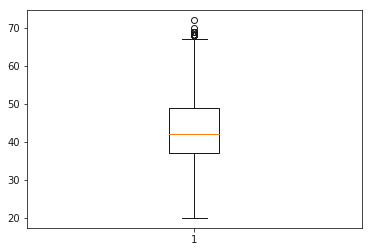

In [183]:
#Boxplot of Age
plt.boxplot(data['AGE'])

Text(0.5,0,'Type of Sex')

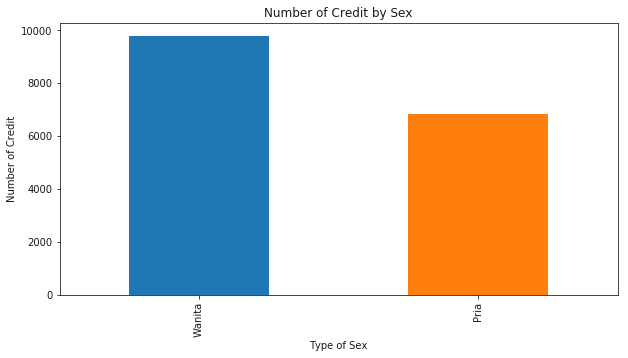

In [184]:
#Distribution of Sex

data['SEX'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title("Number of Credit by Sex")
plt.ylabel('Number of Credit')
plt.xlabel('Type of Sex')

Text(0.5,0,'Type of Payment 1')

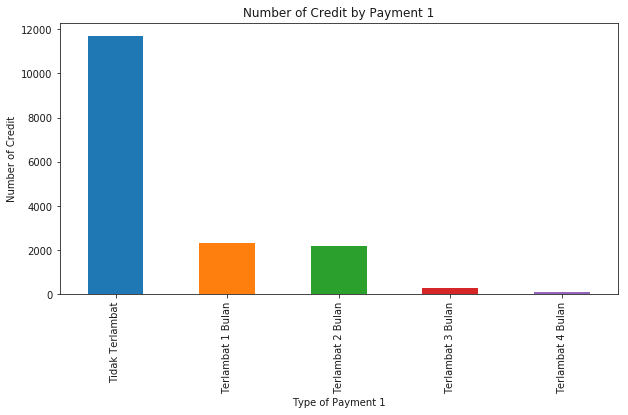

In [185]:
#Distribution of Payment 1

data['PAY_1'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title("Number of Credit by Payment 1")
plt.ylabel('Number of Credit')
plt.xlabel('Type of Payment 1')

Text(0.5,0,'Type of Payment 2')

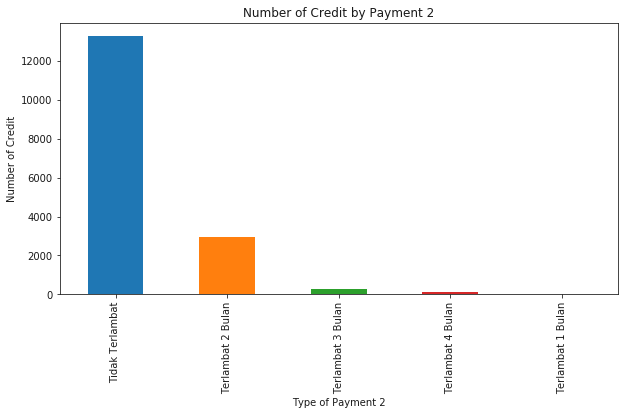

In [186]:
#Distribution of Paymnet 2

data['PAY_2'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title("Number of Credit by Payment 2")
plt.ylabel('Number of Credit')
plt.xlabel('Type of Payment 2')

Text(0.5,0,'Type of Payment 3')

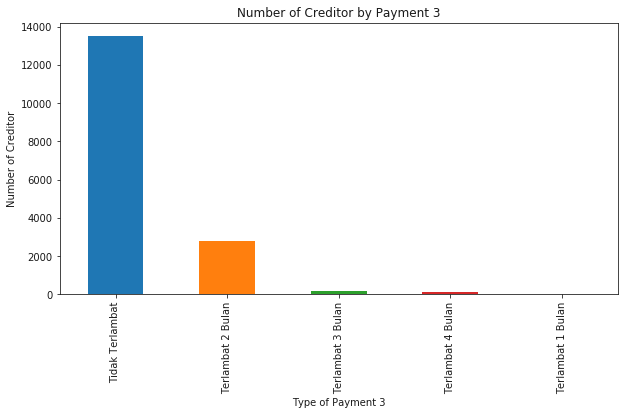

In [187]:
#Distribution of Payment 3

data['PAY_3'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title('Number of Creditor by Payment 3')
plt.ylabel('Number of Creditor')
plt.xlabel('Type of Payment 3')

Text(0.5,0,'Type of Education')

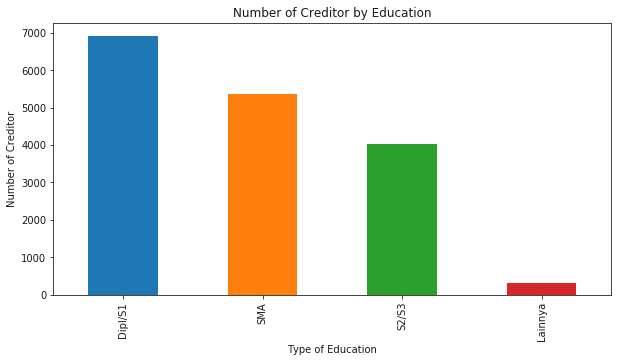

In [188]:
#Distribution of Education

data['EDUCATION'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title("Number of Creditor by Education")
plt.ylabel('Number of Creditor')
plt.xlabel('Type of Education')

Text(0.5,0,'Type of Marriage')

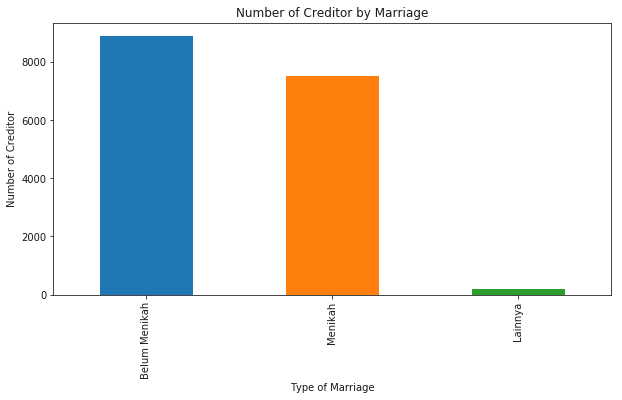

In [189]:
#Distribution of Marital

data['MARRIAGE'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title("Number of Creditor by Marriage")
plt.ylabel('Number of Creditor')
plt.xlabel('Type of Marriage')

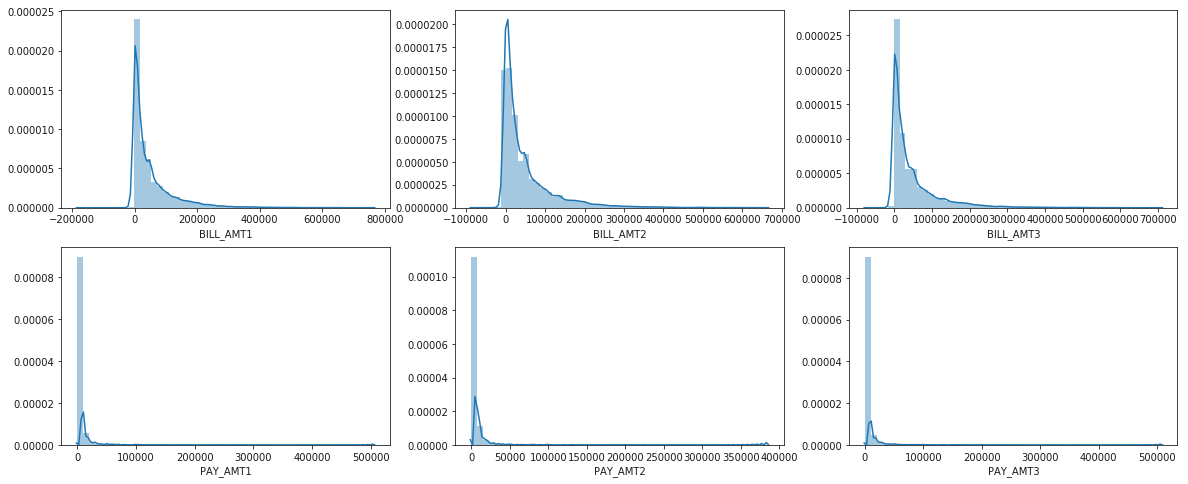

In [190]:
#get distribution plot of numerical data 
#from this, we will know how the data is spread

f=plt.figure(figsize=(20,8))
f.add_subplot(2,3,1)
sns.distplot(data['BILL_AMT1'])
f.add_subplot(2,3,2)
sns.distplot(data['BILL_AMT2'])
f.add_subplot(2,3,3)
sns.distplot(data['BILL_AMT3'])
f.add_subplot(2,3,4)
sns.distplot(data['PAY_AMT1'])
f.add_subplot(2,3,5)
sns.distplot(data['PAY_AMT2'])
f.add_subplot(2,3,6)
sns.distplot(data['PAY_AMT3'])

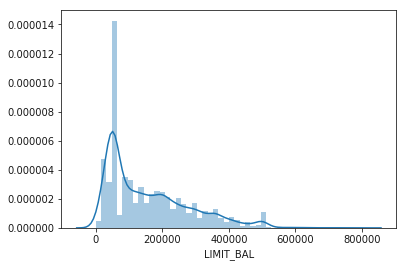

In [191]:
#distribution plot of limit_bal
sns.distplot(data['LIMIT_BAL'])

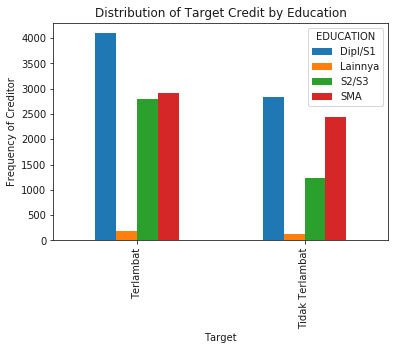

In [192]:
#Distribution Bar plot of variable education classified by Target 
pd.crosstab(data['TARGET'],data['EDUCATION']).plot(kind='bar')
plt.title('Distribution of Target Credit by Education')
plt.xlabel('Target')
plt.ylabel('Frequency of Creditor')
plt.savefig('pur_fre_pout_bar')

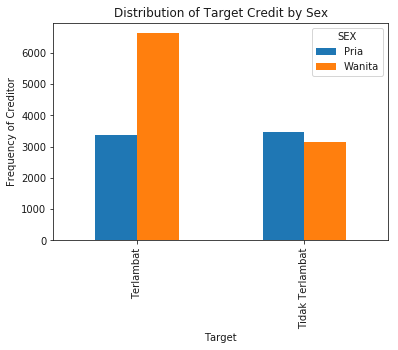

In [193]:
#Distribution Bar plot of variable sex classified by Target
pd.crosstab(data['TARGET'],data['SEX']).plot(kind='bar')
plt.title('Distribution of Target Credit by Sex')
plt.xlabel('Target')
plt.ylabel('Frequency of Creditor')
plt.savefig('pur_fre_pout_bar')

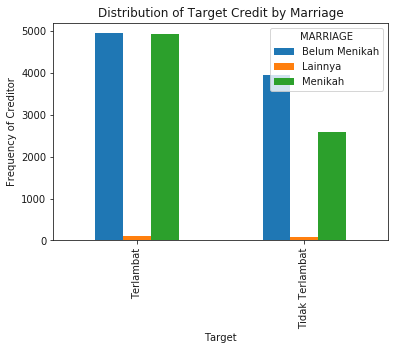

In [194]:
#Distribution Bar plot of variable marriage classified by Target
pd.crosstab(data['TARGET'],data['MARRIAGE']).plot(kind='bar')
plt.title('Distribution of Target Credit by Marriage')
plt.xlabel('Target')
plt.ylabel('Frequency of Creditor')
plt.savefig('pur_fre_pout_bar')

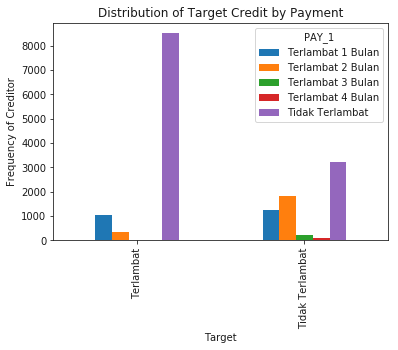

In [195]:
#Distribution Bar plot of variable Payment classified by Target
pd.crosstab(data['TARGET'],data['PAY_1']).plot(kind='bar')
plt.title('Distribution of Target Credit by Payment')
plt.xlabel('Target')
plt.ylabel('Frequency of Creditor')
plt.savefig('pur_fre_pout_bar')

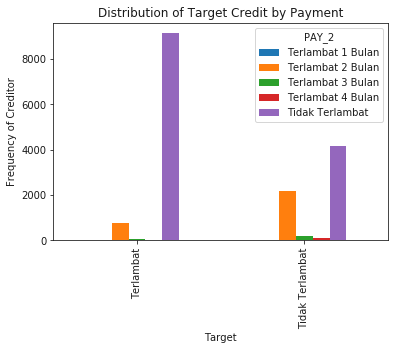

In [196]:
pd.crosstab(data['TARGET'],data['PAY_2']).plot(kind='bar')
plt.title('Distribution of Target Credit by Payment')
plt.xlabel('Target')
plt.ylabel('Frequency of Creditor')
plt.savefig('pur_fre_pout_bar')

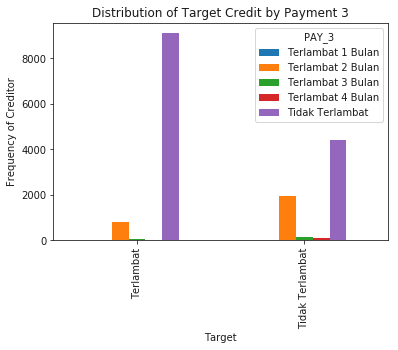

In [197]:
#Distribution Bar plot of variable Payment 3 classified by Target
pd.crosstab(data['TARGET'],data['PAY_3']).plot(kind='bar')
plt.title('Distribution of Target Credit by Payment 3')
plt.xlabel('Target')
plt.ylabel('Frequency of Creditor')
plt.savefig('pur_fre_pout_bar')

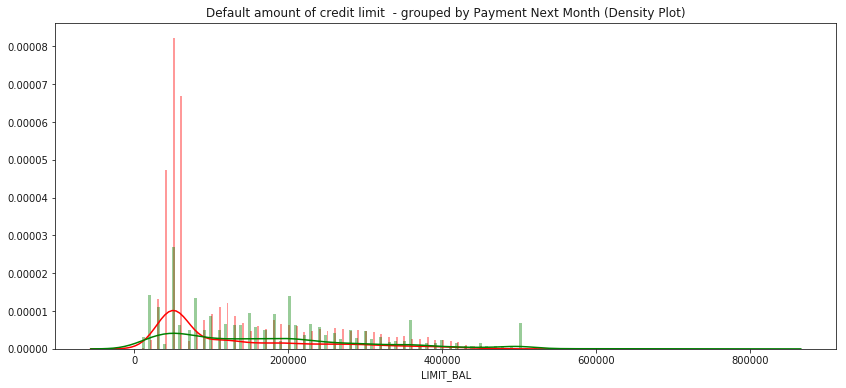

In [198]:
#Distribution Bar plot of variable Bill Limit classified by Target
class_0 = data.loc[data['TARGET'] == 'Terlambat']["LIMIT_BAL"]
class_1 = data.loc[data['TARGET'] == 'Tidak Terlambat']["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

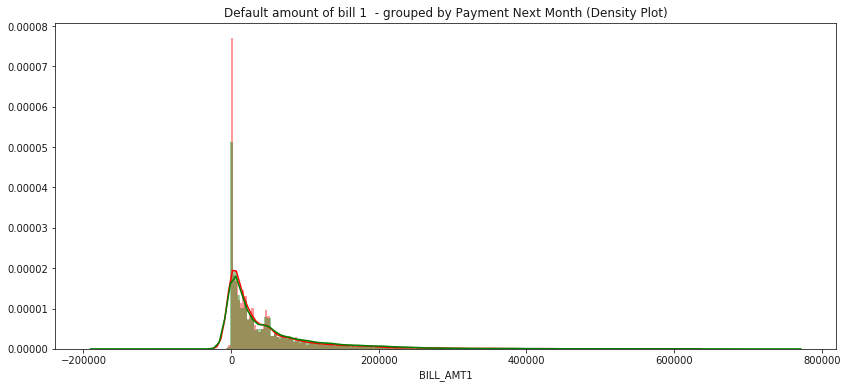

In [199]:
#Distribution Bar plot of variable Bill amount 1 classified by Target
class_0 = data.loc[data['TARGET'] == 'Terlambat']["BILL_AMT1"]
class_1 = data.loc[data['TARGET'] == 'Tidak Terlambat']["BILL_AMT1"]
plt.figure(figsize = (14,6))
plt.title('Default amount of bill 1  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

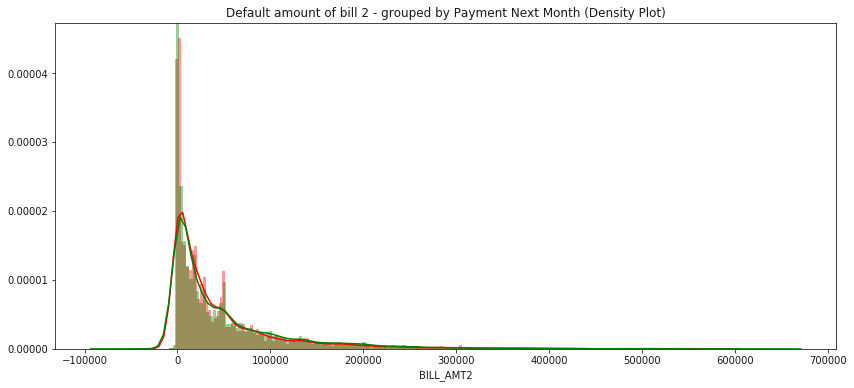

In [200]:
#Distribution Bar plot of variable Bill amount 2 classified by Target
class_0 = data.loc[data['TARGET'] == 'Terlambat']["BILL_AMT2"]
class_1 = data.loc[data['TARGET'] == 'Tidak Terlambat']["BILL_AMT2"]
plt.figure(figsize = (14,6))
plt.title('Default amount of bill 2 - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

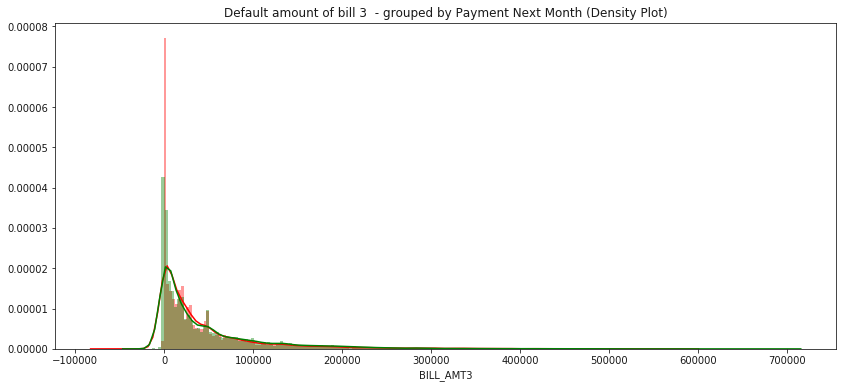

In [201]:
#Distribution Bar plot of variable Bill amount 3 classified by Target
class_0 = data.loc[data['TARGET'] == 'Terlambat']["BILL_AMT3"]
class_1 = data.loc[data['TARGET'] == 'Tidak Terlambat']["BILL_AMT3"]
plt.figure(figsize = (14,6))
plt.title('Default amount of bill 3  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

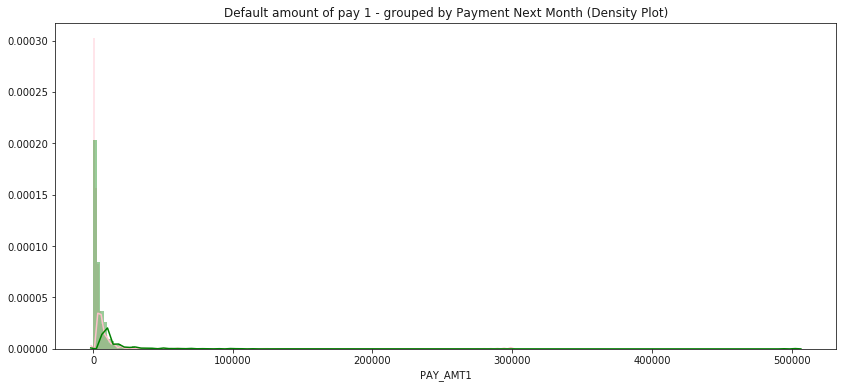

In [202]:
#Distribution Bar plot of variable pay amount 1 classified by Target
class_0 = data.loc[data['TARGET'] == 'Terlambat']["PAY_AMT1"]
class_1 = data.loc[data['TARGET'] == 'Tidak Terlambat']["PAY_AMT1"]
plt.figure(figsize = (14,6))
plt.title('Default amount of pay 1 - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="pink")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

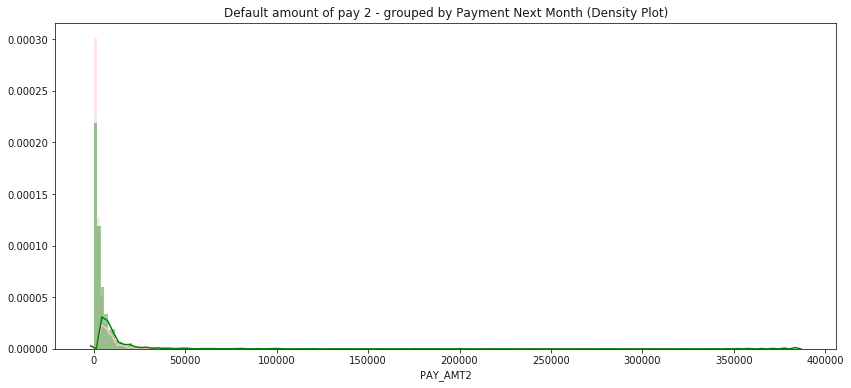

In [203]:
#Distribution Bar plot of variable pay amount 2 classified by Target
class_0 = data.loc[data['TARGET'] == 'Terlambat']["PAY_AMT2"]
class_1 = data.loc[data['TARGET'] == 'Tidak Terlambat']["PAY_AMT2"]
plt.figure(figsize = (14,6))
plt.title('Default amount of pay 2 - grouped by Payment Next Month (Density Plot)')
sns.distplot(class_1,kde=True,bins=200, color="pink")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

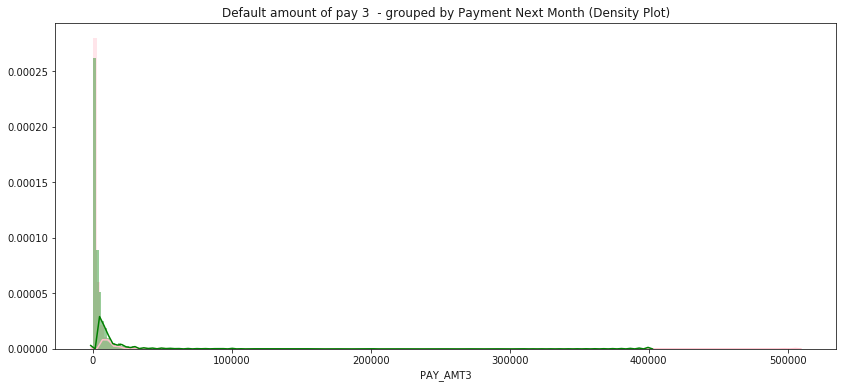

In [204]:
#Distribution Bar plot of variable pay amount 3 classified by Target
class_0 = data.loc[data['TARGET'] == 'Terlambat']["PAY_AMT3"]
class_1 = data.loc[data['TARGET'] == 'Tidak Terlambat']["PAY_AMT3"]
plt.figure(figsize = (14,6))
plt.title('Default amount of pay 3  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="pink")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()